<center>
    <img src="https://raw.githubusercontent.com/nick9303/nick9303.github.io/refs/heads/main/imgs/NPower.png" width="300" alt="NPW logo">
</center>

# **Group 2 Data Anaylsis Project - Analysis of chairs sold on Ebay by category**

**Group Members**
Nigel,
Darshita,
Nicolas,
Ozgur,
Eseosa

**Dataset**
https://www.kaggle.com/datasets/saharnazyaghoobpoor/ecommerca-data-chairs-on-ebay?resource=download

In this project we want to showcase the full data analysis process on a publicly available dataset obtained from Kaggle.

Analysis of this dataset can be useful for businesses to gain insights on market trends for chairs. Some questions we wanted answered and insights gained:

What brands for chairs are selling the most on Ebay?

What are the range of prices for categories of chairs?

What types of chair products are selling?



# **Cleaning the Dataset**

In [ ]:
# import python libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import folium

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Save the dataset in a pandas dataframe object
df = pd.read_csv('https://nick9303.github.io/Ecommerca%20Data.csv')
df.head()


,categories/0,categories/1,availableText,title,endedDate,type,price,subTitle,sold,shipsTo,priceWithCurrency,mpn,itemLocation,brand,available
0,Chairs,Electric Massage Chairs,More than 10 available29 sold,Brown PU Massage Recliner Chair Lazy Boy Sofa ...,NaN,Massage Chair Recliner,339.99,NaN,29.0,United States,US $339.99,S4500,"Los Angeles, California, United States",COSVALVE,10.0
1,Chairs,Electric Massage Chairs,More than 10 available238 sold,Brown PU Massage Heat Recliner Chair Lazy Boy ...,NaN,Massage Recliner Chair,339.99,NaN,238.0,United States,US $339.99,S4500,"Los Angeles, California, United States",COSVALVE,10.0
2,Chairs,Electric Massage Chairs,More than 10 available52 sold,Black PU Massage Recliner Chair Lazy Boy Sofa ...,NaN,Massage Chair Recliner,339.99,NaN,52.0,United States,US $339.99,S4400,"Los Angeles, California, United States",COSVALVE,10.0
3,Electric Massage Chairs,Chairs,5 available1 sold,AI Voice Full Body 4D Zero Gravity Massage Rec...,NaN,Recliner,2299.99,NaN,1.0,United States,"US $2,299.99/ea",S600,"Los Angeles, California, United States",Artist hand,5.0
4,Chairs,NaN,More than 10 available4 sold,Ergonomic Reclining Office Chair Heat & Massag...,NaN,Recliner,124.99,NaN,4.0,Worldwide,US $124.99,Does Not Apply,"Austell, Georgia, United States",OYAJIA,10.0


In [ ]:
# Check summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   categories/0       903 non-null    object 
 1   categories/1       107 non-null    object 
 2   availableText      796 non-null    object 
 3   title              928 non-null    object 
 4   endedDate          36 non-null     object 
 5   type               866 non-null    object 
 6   price              928 non-null    float64
 7   subTitle           3 non-null      object 
 8   sold               140 non-null    float64
 9   shipsTo            928 non-null    object 
 10  priceWithCurrency  928 non-null    object 
 11  mpn                597 non-null    object 
 12  itemLocation       928 non-null    object 
 13  brand              923 non-null    object 
 14  available          711 non-null    float64
dtypes: float64(3), object(12)
memory usage: 108.9+ KB


In [ ]:
# Check statiscal summary for dataframe
df.describe(include='all')


,categories/0,categories/1,availableText,title,endedDate,type,price,subTitle,sold,shipsTo,priceWithCurrency,mpn,itemLocation,brand,available
count,903,107,796,928,36,866,928.000000,3,140.000000,928,928,597,928,923,711.000000
unique,20,13,85,609,19,125,NaN,3,NaN,11,555,365,145,101,NaN
top,Chairs,Chairs,5 available,Massage Recliner Chair Dark Gray Fabric vidaXL,2d 20h,Does not apply,NaN,Waterproof PU & Easy Clean & Remote Control &R...,NaN,United States,US $369.99,Does not Apply,"Rialto, California, United States",vidaXL,NaN
freq,478,33,185,28,7,222,NaN,1,NaN,876,14,103,146,274,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,496.794526,NaN,18.214286,NaN,NaN,NaN,NaN,NaN,6.933896
std,NaN,NaN,NaN,NaN,NaN,NaN,710.276419,NaN,48.198299,NaN,NaN,NaN,NaN,NaN,5.784376
min,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,250.700000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,361.050000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,465.280000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,10.000000


In [ ]:
# View the columns in the dataframe
df.columns

Index(['categories/0', 'categories/1', 'availableText', 'title', 'endedDate',
       'type', 'price', 'subTitle', 'sold', 'shipsTo', 'priceWithCurrency',
       'mpn', 'itemLocation', 'brand', 'available'],
      dtype='object')

In [ ]:
# Check if there are duplicates in the dataframe
duplicates = df.duplicated().sum()
duplicates


33

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# Check for null values
df.isnull().sum()

,0
categories/0,25
categories/1,788
availableText,115
title,0
endedDate,861
type,43
price,0
subTitle,892
sold,756
shipsTo,0


In [ ]:
#drop categories that are unecessary for our analysis

df.drop(['categories/1','available','mpn','subTitle','type','endedDate','title','availableText'], axis=1, inplace=True)
df.head()

,categories/0,price,sold,shipsTo,priceWithCurrency,itemLocation,brand
0,Chairs,339.99,29.0,United States,US $339.99,"Los Angeles, California, United States",COSVALVE
1,Chairs,339.99,238.0,United States,US $339.99,"Los Angeles, California, United States",COSVALVE
2,Chairs,339.99,52.0,United States,US $339.99,"Los Angeles, California, United States",COSVALVE
3,Electric Massage Chairs,2299.99,1.0,United States,"US $2,299.99/ea","Los Angeles, California, United States",Artist hand
4,Chairs,124.99,4.0,Worldwide,US $124.99,"Austell, Georgia, United States",OYAJIA


In [ ]:
# df.drop(['sold'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
categories/0,25
price,0
sold,756
shipsTo,0
priceWithCurrency,0
itemLocation,0
brand,3


In [ ]:
# Replace the NaN values in the sold column with 0
df['sold'] = df['sold'].fillna(0)

In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

,0
categories/0,0
price,0
sold,0
shipsTo,0
priceWithCurrency,0
itemLocation,0
brand,0


In [ ]:
df.shape

(867, 7)

# **Data Normalization**

In [ ]:
# Check datatypes of each column in dataframe
df.dtypes

,0
categories/0,object
price,float64
sold,float64
shipsTo,object
priceWithCurrency,object
itemLocation,object
brand,object


In [ ]:
# Filter for rows where brand is 'Unbranded'
df_unbranded = df[df['brand'] == 'Unbranded']

# Apply lower() to the 'brand' column for these rows
df.loc[df_unbranded.index, 'brand'] = df.loc[df_unbranded.index, 'brand'].str.lower()

Note: We have two different currencies in the priceWithCurrency column (AU and USD). For comparing the data and visualizing the data with charts, we want to convert all prices to USD.

In [ ]:

#Find all rows that match with AU in priceWithCurrency
pattern = '^AU'
priceWithAU = df[df['priceWithCurrency'].astype(str).str.match(pattern)]
priceWithAU

,categories/0,price,sold,shipsTo,priceWithCurrency,itemLocation,brand
769,Electric Massage Chairs,999.99,0.0,Worldwide,AU $999.99,"Gledswood Hills, New South Wales, Australia",NNEVL
804,Electric Massage Chairs,979.99,0.0,Worldwide,AU $979.99,"Gledswood Hills, New South Wales, Australia",NNEVL
817,Every Other Thing,1449.99,0.0,Worldwide,"AU $1,449.99","Gledswood Hills, New South Wales, Australia",NNEVL
818,Every Other Thing,1089.99,0.0,Worldwide,"AU $1,089.99","Gledswood Hills, New South Wales, Australia",NNEVL
819,Every Other Thing,979.99,0.0,Worldwide,AU $979.99,"Gledswood Hills, New South Wales, Australia",NNEVL
820,Every Other Thing,959.99,0.0,Worldwide,AU $959.99,"Gledswood Hills, New South Wales, Australia",NNEVL
821,Every Other Thing,1349.99,0.0,Worldwide,"AU $1,349.99","Gledswood Hills, New South Wales, Australia",NNEVL
824,Every Other Thing,999.99,0.0,Worldwide,AU $999.99,"Gledswood Hills, New South Wales, Australia",NNEVL
827,"Sofas, Armchairs & Couches",40.99,0.0,Worldwide,AU $40.99,"Shenzhen, China",unbranded
843,Every Other Thing,5609.99,0.0,Worldwide,"AU $5,609.99","Gledswood Hills, New South Wales, Australia",NNEMB


In [ ]:
# Convert AU prices to USD and update the newly formatted prices in the original dataframe

# Convert AU to USD. Conversion rate is 0.65 AU to USD
exchangeRate = 0.65
priceWithAU['price'] = round(priceWithAU['price'] * exchangeRate, 2)
priceWithAU



<ipython-input-443-4755516d2f97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceWithAU['price'] = round(priceWithAU['price'] * exchangeRate, 2)


,categories/0,price,sold,shipsTo,priceWithCurrency,itemLocation,brand
769,Electric Massage Chairs,649.99,0.0,Worldwide,AU $999.99,"Gledswood Hills, New South Wales, Australia",NNEVL
804,Electric Massage Chairs,636.99,0.0,Worldwide,AU $979.99,"Gledswood Hills, New South Wales, Australia",NNEVL
817,Every Other Thing,942.49,0.0,Worldwide,"AU $1,449.99","Gledswood Hills, New South Wales, Australia",NNEVL
818,Every Other Thing,708.49,0.0,Worldwide,"AU $1,089.99","Gledswood Hills, New South Wales, Australia",NNEVL
819,Every Other Thing,636.99,0.0,Worldwide,AU $979.99,"Gledswood Hills, New South Wales, Australia",NNEVL
820,Every Other Thing,623.99,0.0,Worldwide,AU $959.99,"Gledswood Hills, New South Wales, Australia",NNEVL
821,Every Other Thing,877.49,0.0,Worldwide,"AU $1,349.99","Gledswood Hills, New South Wales, Australia",NNEVL
824,Every Other Thing,649.99,0.0,Worldwide,AU $999.99,"Gledswood Hills, New South Wales, Australia",NNEVL
827,"Sofas, Armchairs & Couches",26.64,0.0,Worldwide,AU $40.99,"Shenzhen, China",unbranded
843,Every Other Thing,3646.49,0.0,Worldwide,"AU $5,609.99","Gledswood Hills, New South Wales, Australia",NNEMB


In [ ]:
# Update original Dataframe with converted prices
df.loc[priceWithAU.index, 'price'] = priceWithAU['price']

# We can drop priceWithCurrency since all our data is in one currency now
df.drop(['priceWithCurrency'], axis=1, inplace=True)
df.head(15)

<ipython-input-444-d37bd7e91cd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['priceWithCurrency'], axis=1, inplace=True)


,categories/0,price,sold,shipsTo,itemLocation,brand
0,Chairs,339.99,29.0,United States,"Los Angeles, California, United States",COSVALVE
1,Chairs,339.99,238.0,United States,"Los Angeles, California, United States",COSVALVE
2,Chairs,339.99,52.0,United States,"Los Angeles, California, United States",COSVALVE
3,Electric Massage Chairs,2299.99,1.0,United States,"Los Angeles, California, United States",Artist hand
4,Chairs,124.99,4.0,Worldwide,"Austell, Georgia, United States",OYAJIA
5,Chairs & Stools,131.39,15.0,United States,"Wilsonville, Oregon, United States",Vinsetto
6,Chairs,279.99,12.0,United States,"Atlanta, Georgia, United States",YODOLLA
7,Chairs,309.68,10.0,United States,"Ontario, California, United States",Recliner
8,Chairs,225.99,29.0,United States,"Wilsonville, Oregon, United States",HOMCOM
9,Electric Massage Chairs,249.99,110.0,United States,"Atlanta, Georgia, United States",Esright


# **Box Plot**


In [ ]:
# Change index to labels based on categories
df.set_index('categories/0', inplace=True)
df.head()

,price,sold,shipsTo,itemLocation,brand
categories/0,,,,,
Chairs,339.99,29.0,United States,"Los Angeles, California, United States",COSVALVE
Chairs,339.99,238.0,United States,"Los Angeles, California, United States",COSVALVE
Chairs,339.99,52.0,United States,"Los Angeles, California, United States",COSVALVE
Electric Massage Chairs,2299.99,1.0,United States,"Los Angeles, California, United States",Artist hand
Chairs,124.99,4.0,Worldwide,"Austell, Georgia, United States",OYAJIA


In [ ]:

df_CP = df.loc[:, 'price']
df_CP.head()

,price
categories/0,
Chairs,339.99
Chairs,339.99
Chairs,339.99
Electric Massage Chairs,2299.99
Chairs,124.99


In [ ]:
# See the distrubtion of data across categories
df_CPcount = df.groupby('categories/0')['price'].count()
df_CPcount

,price
categories/0,
Athletic Shoes,1
Chairs,475
Chairs & Stools,78
Cubicles & Systems Furniture,2
Desks & Tables,2
Electric Massage Chairs,126
Every Other Thing,7
Furniture Parts,3
Home Office Desks,6


In [ ]:
# Since we only want chairs we can drop unrelated categories
categories_to_drop = ['Athletic Shoes', 'Cubicles & Systems Furniture',
                       'Desks & Tables', 'Furniture Parts', 'Laptop Power Adapters/Chargers',
                       'Massagers','Multipurpose AC to DC Adapters','Office Furniture','Seat & Posture Cushions','Patio & Garden Furniture Sets','Other Office','Other Mobility Equipment','Home Office Desks','Furniture Parts','Every Other Thing']
df = df.drop(categories_to_drop, errors='ignore')
df.head()

,price,sold,shipsTo,itemLocation,brand
categories/0,,,,,
Chairs,339.99,29.0,United States,"Los Angeles, California, United States",COSVALVE
Chairs,339.99,238.0,United States,"Los Angeles, California, United States",COSVALVE
Chairs,339.99,52.0,United States,"Los Angeles, California, United States",COSVALVE
Electric Massage Chairs,2299.99,1.0,United States,"Los Angeles, California, United States",Artist hand
Chairs,124.99,4.0,Worldwide,"Austell, Georgia, United States",OYAJIA


In [ ]:
df_e = df.loc[['Electric Massage Chairs']]
df_e.head()

,price,sold,shipsTo,itemLocation,brand
categories/0,,,,,
Electric Massage Chairs,2299.99,1.0,United States,"Los Angeles, California, United States",Artist hand
Electric Massage Chairs,249.99,110.0,United States,"Atlanta, Georgia, United States",Esright
Electric Massage Chairs,138.31,0.0,United States,"Lawnside, New Jersey, United States",UIRIO
Electric Massage Chairs,267.99,2.0,United States,"Wilsonville, Oregon, United States",HOMCOM
Electric Massage Chairs,369.00,0.0,United States,"Rowland Heights, California, United States",YX-Furniture


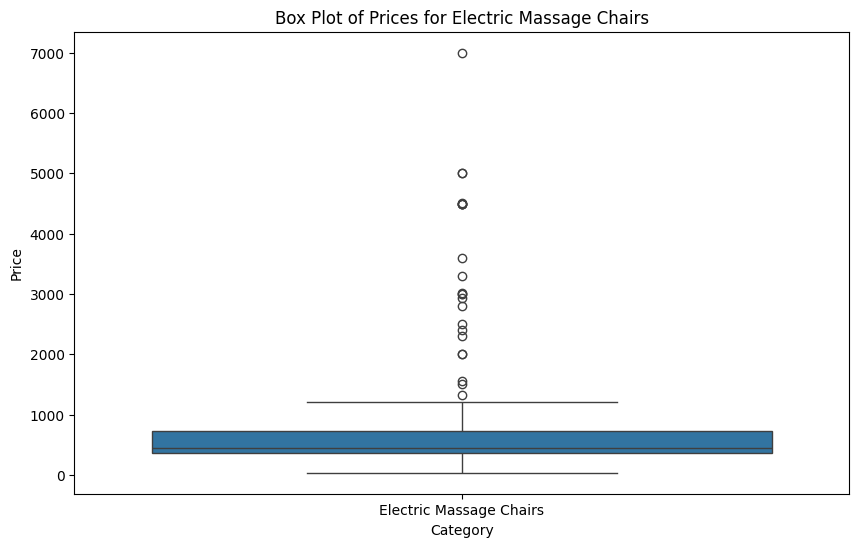

In [ ]:
# Boxplot with seaborn showing the prices for electric massage chairs


plt.figure(figsize=(10, 6))
sns.boxplot(x='categories/0', y='price', data=df_e)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Box Plot of Prices for Electric Massage Chairs')

# Show the plot
plt.show()

In [ ]:
df_ot = df.loc[['Sofas, Armchairs & Couches','Sofas & Armchairs','Other Home Organization','Chairs',]]
palette = ['red', 'blue', 'green', 'purple']

<ipython-input-452-0de68cfacdf7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categories/0', y='price', data=df_ot,palette=palette)


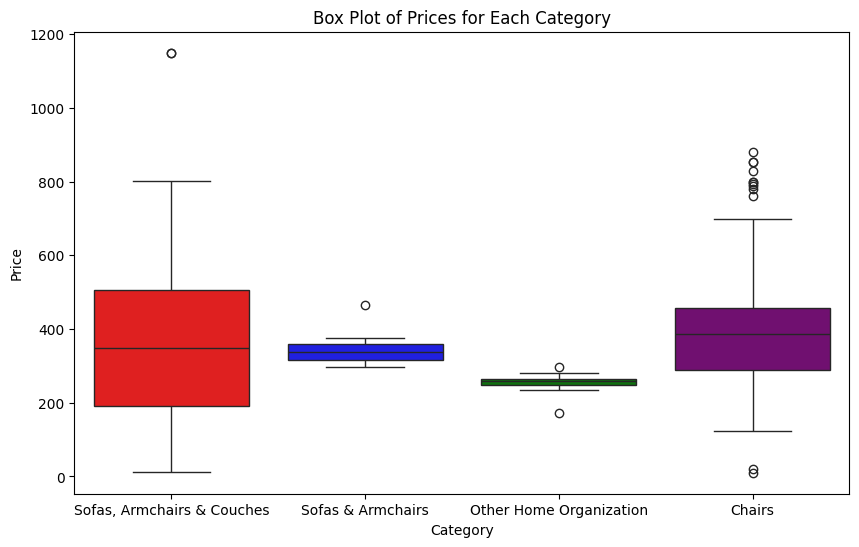

In [ ]:
# Boxplot showing the distribution of prices across different types of chair products

# Plot the figure with seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='categories/0', y='price', data=df_ot,palette=palette)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Box Plot of Prices for Each Category')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Number Of Sold Electric Massage Chairs')

<Figure size 1000x600 with 0 Axes>

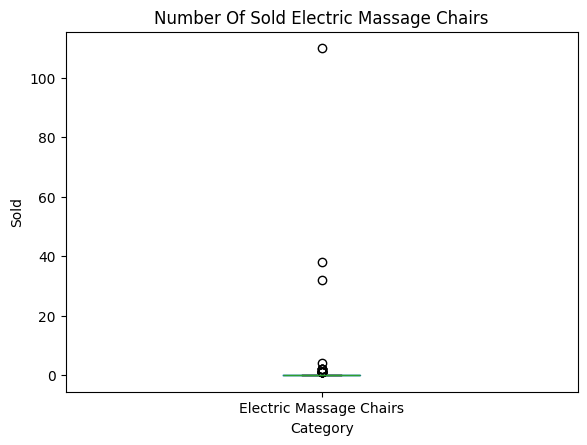

In [ ]:
# Plot the figures using Matplotlib
plt.figure(figsize=(10, 6))
df_e.boxplot(column='sold', by='categories/0')
plt.suptitle('')
plt.grid(False)
# Set labels and title
plt.xlabel('Category')
plt.ylabel('Sold')
plt.title('Number Of Sold Electric Massage Chairs')

Text(0.5, 1.0, 'Box Plot of Prices for Each Category')

<Figure size 1000x600 with 0 Axes>

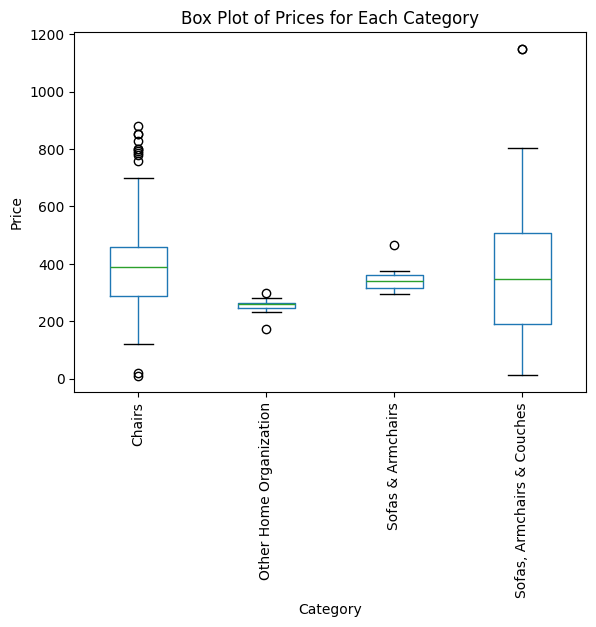

In [ ]:


plt.figure(figsize=(10, 6))
df_ot.boxplot(column='price', by='categories/0', rot=90)
plt.suptitle('')
plt.grid(False)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Box Plot of Prices for Each Category')



In [ ]:
# Calculate quantiles
Q1 = df_e['price'].quantile(0.25)
Q3 = df_e['price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on price
outliers = df_e[(df_e['price'] < lower_bound) | (df_e['price'] > upper_bound)]

# Remove outliers and create a new DataFrame
num_outliers = outliers.shape[0]
df_sin = df.drop(outliers.index)

# Now you can use df_sin for further analysis

<Axes: ylabel='price'>

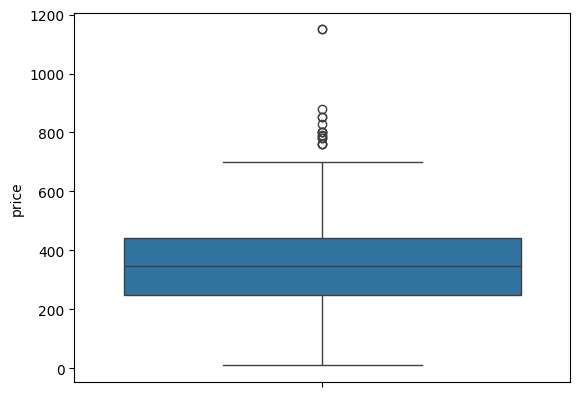

In [ ]:
sns.boxplot( y="price", data=df_sin)

**Part 1 & 2 Breakdown**

The dataset we chose was e-commerce data obtained from Ebay. We wanted to choose a dataset that fit our groups assigned chart: Box plot. Box plots show the statistical information of numerical data, so the prices of products sold can be a great fit for a box plot. It can show the full range of prices across many products sold and represent information such as the quartile ranges and median.

#  **Word Cloud**


In [ ]:


# Assuming your DataFrame is named 'df' with columns 'brand' and 'price'

# Calculate total revenue for each brand
brand_revenue = df.groupby('brand')['price'].sum()

# Create the string of brands proportional to revenue
max_words = 101
total_revenue = brand_revenue.sum()
word_string = ''
for brand, revenue in brand_revenue.items():
    repeat_num_times = int(revenue / total_revenue * max_words)
    word_string += (brand + ' ') * repeat_num_times

# Print or use the word_string
word_string

'BeautyHealth COSVALVE COSVALVE Does not apply Does not apply Does not apply Does not apply Does not apply FDW Not Available Not Available Not Available Osaki Osaki Osaki Osaki Osaki Osaki Osaki Osaki Osaki Osaki Osaki Real Relax Real Relax Real Relax Recliner TAUS Unbranded/Generic Unbranded/Generic Unbranded/Generic Unbranded/Generic Unbranded/Generic Unbranded/Generic unbranded unbranded unbranded unbranded unbranded unbranded unbranded unbranded unbranded unbranded unbranded unbranded unbranded unbranded vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL vidaXL '

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


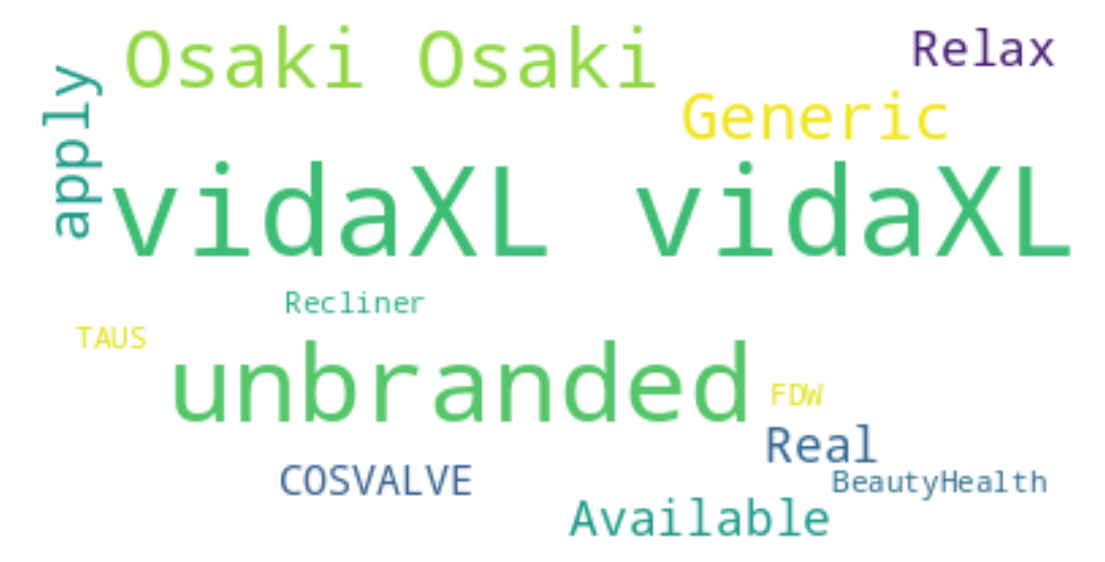

In [ ]:
# display the cloud
stopwords = set(STOPWORDS)
stopwords.add('vidaXL')
stopwords.add('Osaki')
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_wc = df.groupby('brand')['price'].count()
df_wc.head()

,price
brand,
21st Century,2
AECOJOY,1
ANTONIA,2
Aosom LLC,5
Artist hand,1


In [ ]:
# Calculate total revenue for each brand
category_revenue = df.groupby('categories/0')['price'].sum()

# Create the string of brands proportional to revenue
max_words = 101
total_revenue = category_revenue.sum()
word_string = ''
for category, revenue in category_revenue.items():
    repeat_num_times = int(revenue / total_revenue * max_words)
    word_string += (category + ' ') * repeat_num_times

# Print or use the word_string
word_string

'Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs Chairs & Stools Chairs & Stools Chairs & Stools Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric Massage Chairs Electric

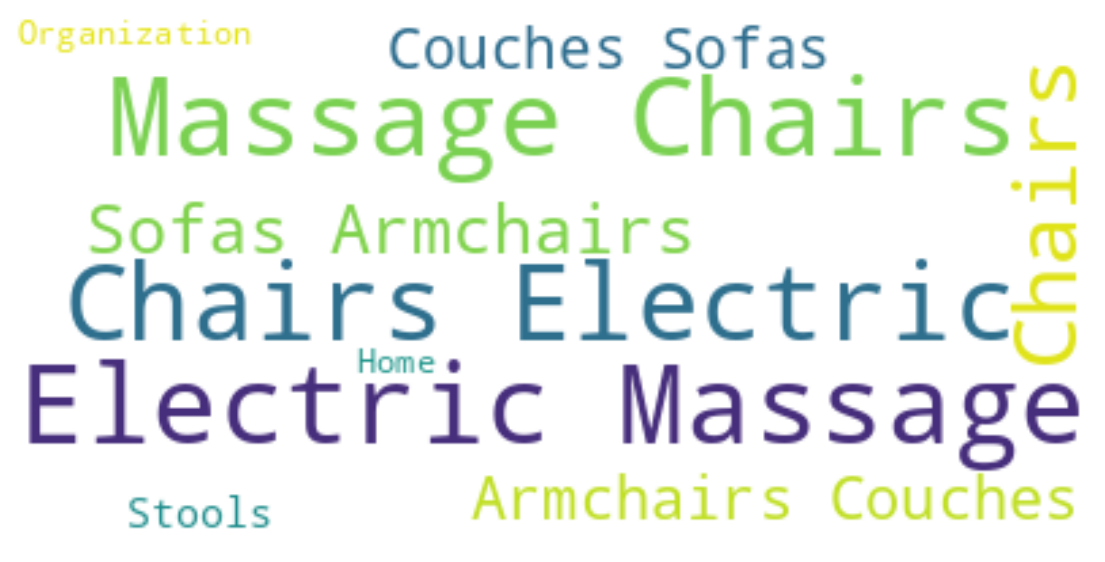

In [ ]:
# display the cloud
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='white').generate(word_string)
stopwords = set(STOPWORDS)

plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Dashboard**


In [ ]:
df_CPcount = df.groupby('categories/0')['sold'].count()
df_CPcount

,sold
categories/0,
Chairs,475
Chairs & Stools,78
Electric Massage Chairs,126
Other Home Organization,34
Sofas & Armchairs,32
"Sofas, Armchairs & Couches",77


In [ ]:
# Find which brands have sold the most products
df_sold = df.groupby('brand')['sold'].count()

df_most_sold_brand = df_sold.sort_values(ascending=False).head(5)
df_most_sold_brand

,sold
brand,
vidaXL,255
unbranded,153
Unbranded/Generic,72
Does not apply,56
COSVALVE,22


In [ ]:
df_most_sold_10_brand = df_wc.sort_values(ascending=False).head(10)
df_most_sold_10_brand


,price
brand,
vidaXL,255
unbranded,153
Unbranded/Generic,72
Does not apply,56
COSVALVE,22
Not Available,20
Vinsetto,17
Recliner,14
Costway,12


<ipython-input-466-7973ad03e1e7>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-466-7973ad03e1e7>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


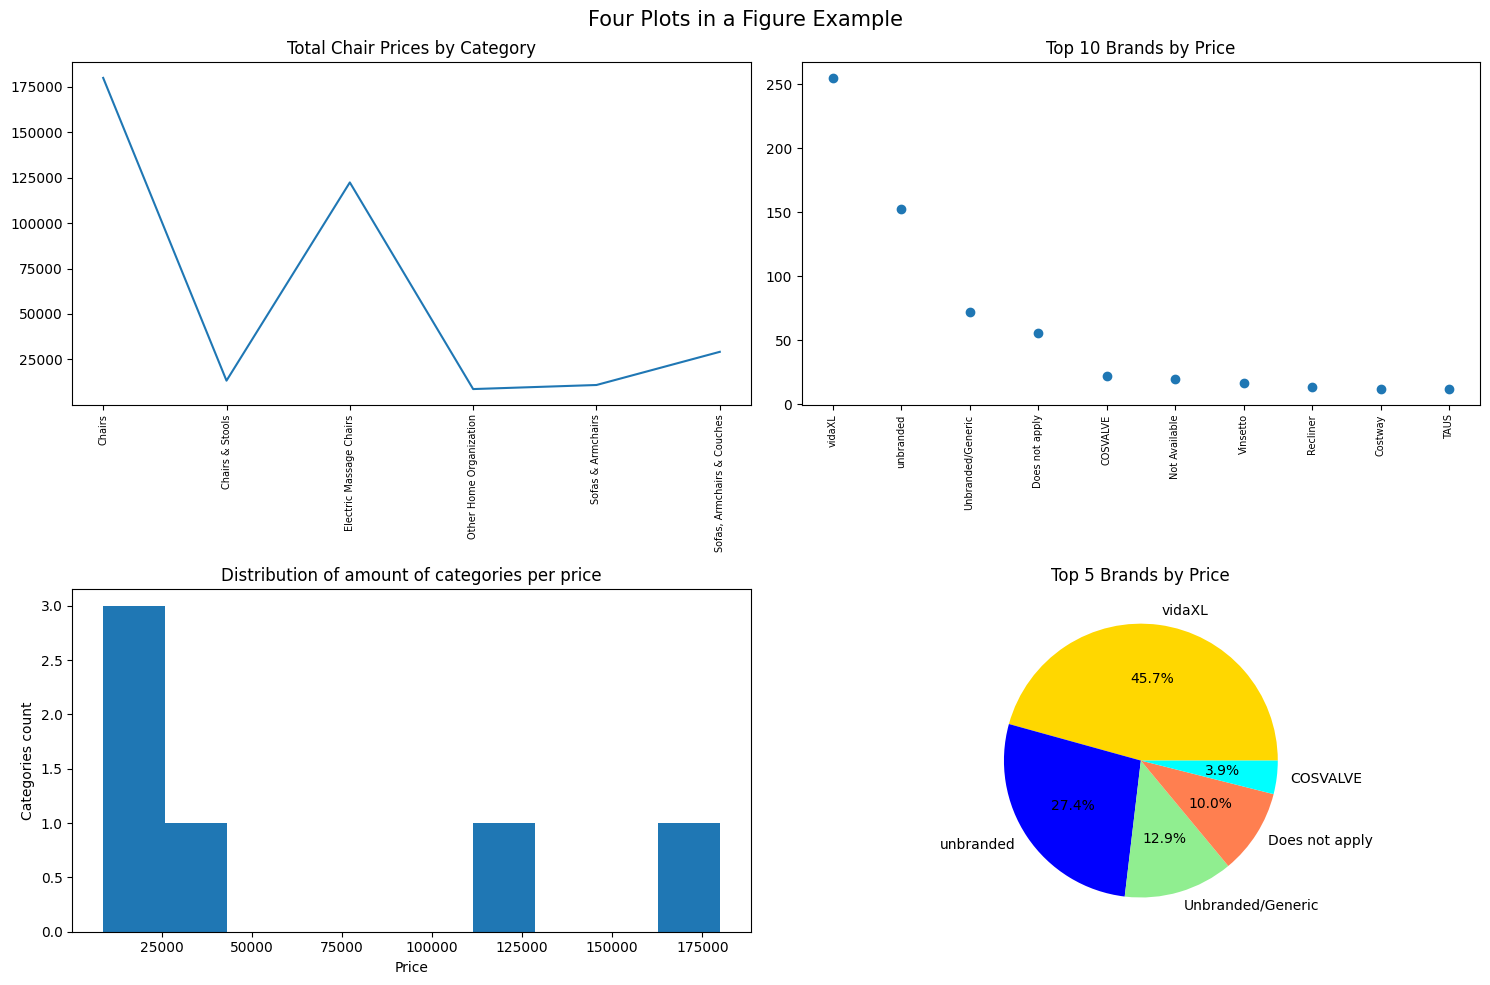

In [ ]:
# @title DashBoard
 # Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(15, 10))
    # Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(category_revenue)
ax1.set_title('Total Chair Prices by Category')
ax1.tick_params(axis='x', labelsize=7)  # X-axis tick label font size
# Rotate the x-axis labels by 90 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    # Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(df_most_sold_10_brand.index, df_most_sold_10_brand)
ax2.set_title('Top 10 Brands by Price')
ax2.tick_params(axis='x', labelsize=7)  # X-axis tick label font size
# Rotate the x-axis labels by 90 degrees
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

    # Add the third subplot (bottom-left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(category_revenue)
ax3.set_title('Distribution of amount of categories per price')
ax3.set_xlabel('Price')
ax3.set_ylabel('Categories count')
fig.subplots_adjust(hspace=0.7, wspace=0.3)

    # Add the fourth subplot (bottom-right)
ax4 = fig.add_subplot(2, 2, 4)

ax4.pie(df_most_sold_brand, labels=df_most_sold_brand.index,
           colors = ['gold','blue','lightgreen','coral','cyan'],
           autopct='%1.1f%%')
ax4.set_aspect('equal')
ax4.set_title('Top 5 Brands by Price')
    #Adding a Title for the Overall Figure
fig.suptitle('Four Plots in a Figure Example', fontsize=15)
    # Adjust spacing between subplots
fig.tight_layout()

    # Show the figure
plt.show()